In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
name = 'ALIOR-BANK'

In [2]:
df = pd.read_html('https://www.biznesradar.pl/raporty-finansowe-bilans/'+name+',Q')[-3].drop([
                                                                0,7,9,12,20,22,24,25,26,27,28,29,30]).set_index('Unnamed: 0')
shares = pd.read_html('https://www.biznesradar.pl/wskazniki-wartosci-rynkowej/'+name)[0].drop([0,2,3,4,5,6,7,8,9]).set_index('Unnamed: 0') 
zis =  pd.read_html('https://www.biznesradar.pl/raporty-finansowe-rachunek-zyskow-i-strat/'+name+',Q')[2].drop([
                                                                                0,1,8,9,10,11,14,15,16,18,20]).set_index('Unnamed: 0')


del df["Unnamed: "+str(len(df.columns))]  
del shares["Unnamed: "+str(len(shares.columns))] 
del zis["Unnamed: "+str(len(zis.columns))]

df = df.drop(df.columns[0:4],axis=1)
shares = shares.drop(shares.columns[0:(len(shares.columns)-len(df.columns))]   ,axis=1)
zis = zis.drop(zis.columns[0:(len(zis.columns)-len(df.columns))]   ,axis=1)
df.columns = df.columns.str.slice(start=2, stop=7)
zis.columns = shares.columns = df.columns


for i in range(len(df.columns)):
    df[str(df.columns[i])] = df[str(df.columns[i])].str.replace('(k/k).*','')
    df[str(df.columns[i])] = df[str(df.columns[i])].str.replace('(r/r).*','')
    zis[str(zis.columns[i])] = zis[str(zis.columns[i])].str.replace('(k/k).*','')
    zis[str(zis.columns[i])] = zis[str(zis.columns[i])].str.replace('(r/r).*','')
    
    df[str(df.columns[i])] = df[str(df.columns[i])].str.replace(' ','')
    shares[str(shares.columns[i])] = shares[str(shares.columns[i])].str.replace(' ','')
    zis[str(zis.columns[i])] = zis[str(zis.columns[i])].str.replace(' ','')
    
df = df.apply(pd.to_numeric, errors='ignore')
shares = shares.apply(pd.to_numeric, errors='ignore')
zis = zis.apply(pd.to_numeric, errors='ignore')
df

,13/Q1,13/Q2,13/Q3,13/Q4,14/Q1,14/Q2,14/Q3,14/Q4,15/Q1,15/Q2,...,18/Q4,19/Q1,19/Q2,19/Q3,19/Q4,20/Q1,20/Q2,20/Q3,20/Q4,21/Q1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Gotówka i operacje z bankami centralnymi,728540,721980,755303,1067227,1077576,1057413,1018716,1158440.0,1377659,1814603,...,1639033,1337436,1786149,946753,1379127,1960949,1128515,1636919,2459901,2163566
Należności od banków,137511,169520,181811,254199,278448,305948,297497,449378.0,319822,502779,...,612444,508103,998666,2944993,212885,276081,290545,330542,508371,400453
Aktywa finansowe przeznaczone do obrotu,214952,265384,234261,243291,207564,284808,420848,476821.0,525101,427473,...,13727570,14030865,14110362,12707488,15798674,14197506,16756828,15062147,15744672,17367267
Pochodne instrumenty zabezpieczające,0,476,3463,12099,20553,15671,53036,80205.0,119971,49445,...,112400,106674,132587,135182,134832,292922,379652,367017,334977,217660
Należności od klientów,15619367,17369735,18149534,19657900,20935596,21882525,22789454,23647990.0,27410671,28344652,...,54245924,55393764,56664314,56684484,55871308,56518126,55703480,55995884,56215422,56272609
Inwestycyjne aktywa finansowe,3259304,3446706,2929182,3388525,3172488,2784204,3799310,2652126.0,2494144,2713708,...,0,0,0,0,0,0,0,0,0,0
Wartości niematerialne,157627,167406,169044,188050,187784,190006,208933,215564.0,354399,357654,...,572320,572372,575071,577604,580352,577898,507747,461424,425109,420568
Rzeczowy majątek trwały,207915,206866,206227,215121,208322,204248,195899,191835.0,187521,184272,...,460659,807830,814843,787556,763585,741526,713310,700119,702381,693720
Aktywa z tytułu odroczonego podatku dochodowego netto,138063,129494,129576,143793,146951,145169,127900,147849.0,204514,228238,...,1035624,1059503,1099648,1113812,1164764,1139404,1223388,1222493,1218282,1232264


In [5]:
class Balance:
    def __init__(self , df):
        self.time = df.columns
        self.shares = shares.iloc[0]
        self.year = [ self.time[i] for i in range(3,len(self.time),4)]
        self.year = np.append(self.year , '21/Q4')
        self.revenue = zis.iloc[0] + zis.iloc[3]
        self.net_profit = zis.iloc[10]
        self.Last4_revenue = [ np.sum(self.revenue[i-4:i]) for i in range(4,len(self.shares)+1) ]
        self.Last4_profit = [ np.sum(self.net_profit[i-4:i]) for i in range(4,len(self.shares)+1) ]
        self.Revenue_year = [ np.sum(self.revenue[i:i+4]) for i in range(0,len(self.shares),4) ]
        self.Gross_profit = zis.iloc[9]
        self.credit_reserves = zis.iloc[6]
        self.client_receivables = df.iloc[4]
        self.client_debt = df.iloc[14]
        
        self.Equity = df.iloc[18]
        self.cash = df.iloc[0]
        self.Assets_total = df.iloc[9]
        self.Assets_year_mean = [ np.mean(self.Assets_total[i:i+4]) for i in range(0,len(self.shares),4) ]
        
        self.ROE = self.Last4_profit/self.Equity[3:len(self.Equity)] 
        self.beta = self.Equity[3:len(self.Equity)]/self.Last4_revenue
        self.Assets_productivity = [ self.Revenue_year[i]/self.Assets_year_mean[i]*100 for i in range(0,len(self.Revenue_year))]
        
    def equity(self):
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(311)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        
        plt.bar(self.time, self.Equity/self.shares*1000, 
                label='equity/share ='"$"+str(round(self.Equity[len(self.shares)-1]/self.shares[len(self.shares)-1]*1000,2))+"$")
        plt.plot(self.time, self.cash/self.shares*1000 , color='green', linewidth = 3, 
                 label='cash/share ='"$"+str(round(self.cash[len(self.shares)-1]/self.shares[len(self.shares)-1]*1000,2))+"$")
        
        plt.xticks(rotation = 50 , fontsize = 12)
        plt.legend(loc='best' , fontsize = 12 )
        self.ax = plt.subplot(312)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        
        plt.bar(self.time[3:len(self.shares)], self.ROE*100, color='darkgreen')
        self.ax.set_title('ROE')
        self.ax.set_ylabel('[%]')
        plt.xticks(rotation = 50 , fontsize = 12)
        plt.tight_layout(pad=3)
        self.ax = plt.subplot(313)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        
        plt.plot(self.time[3:len(self.shares)], self.beta[3:len(self.shares)]*self.ROE*100 )
        self.ax.set_title('ROE*BETA')
        self.ax.set_ylabel('[%]')
        plt.xticks(rotation = 50 , fontsize = 12)
        plt.tight_layout(pad=3)
        
        
    def cover(self):
        self.fig = plt.figure(figsize = (20,18) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        plt.bar(self.time, self.client_receivables/self.client_debt, label='clients receives/debt')
        
        # plt.plot(self.time, self.cash/np.absolute(self.credit_reserves), label = 'cash / credit reserves')
        # plt.plot(self.time, self.client_receivables/np.absolute(self.credit_reserves), label= ' receives / credit reserves')
        plt.xticks(rotation = 50)        
        self.ax.legend(loc='best')

None

None

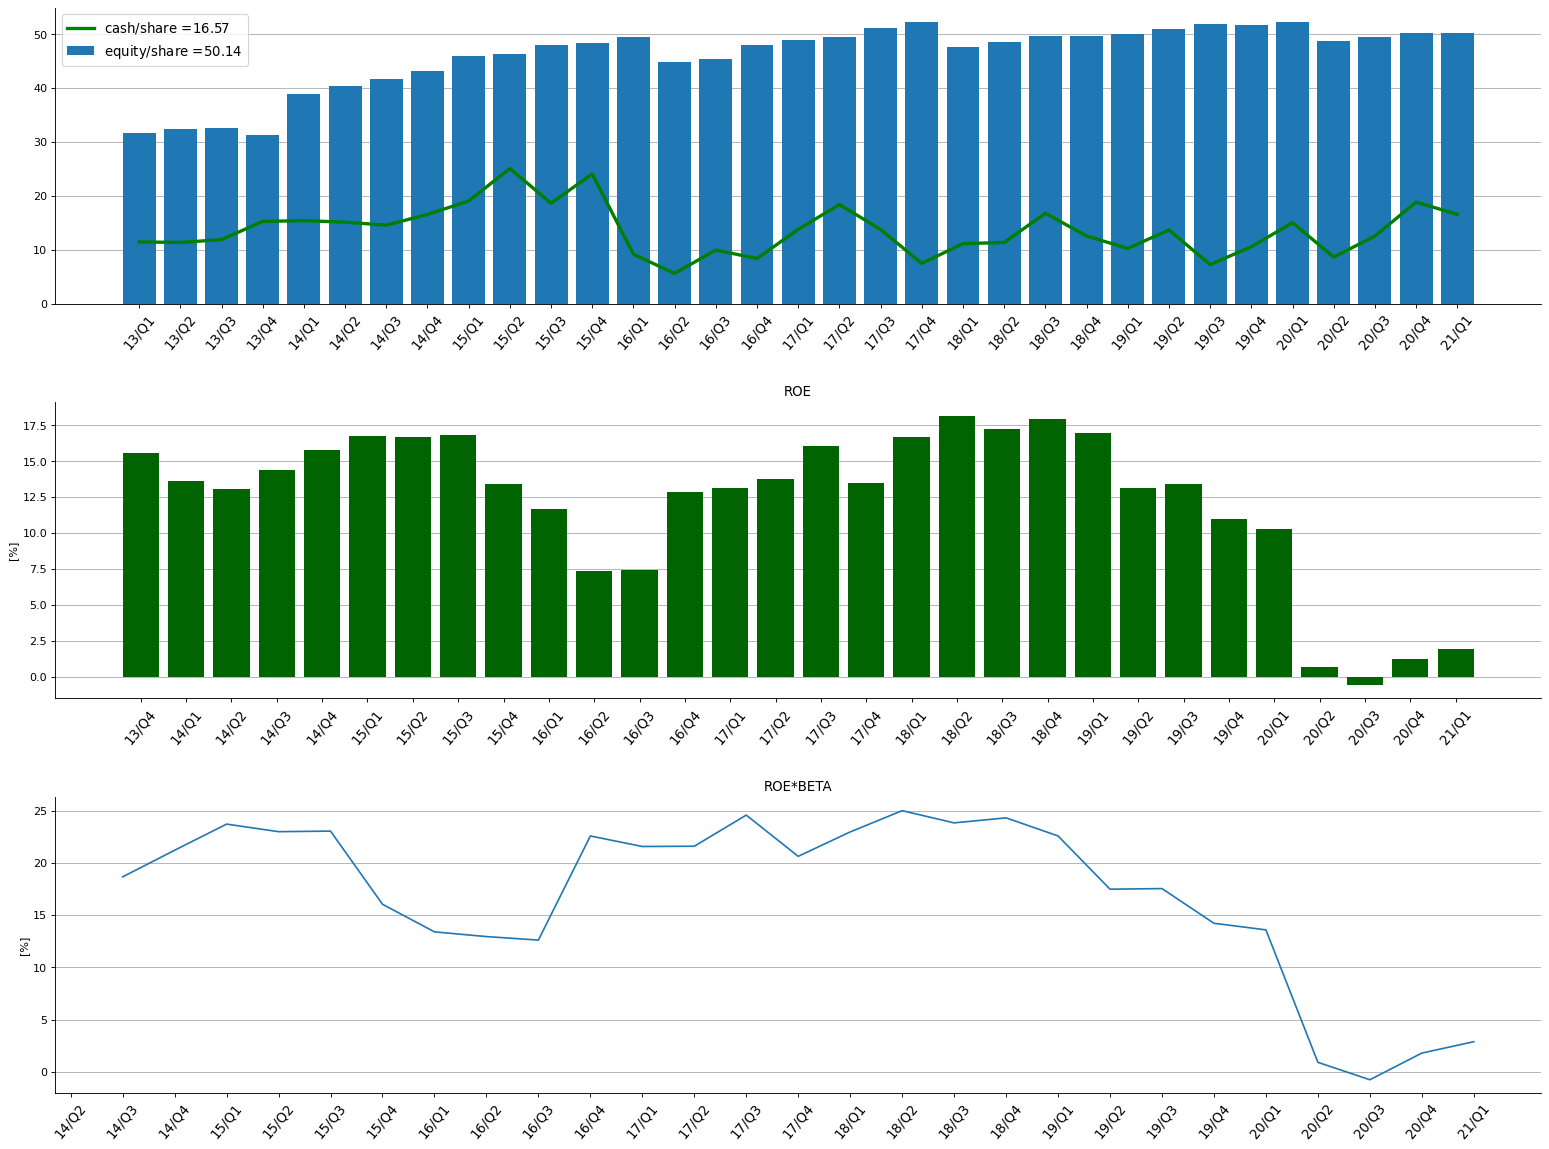

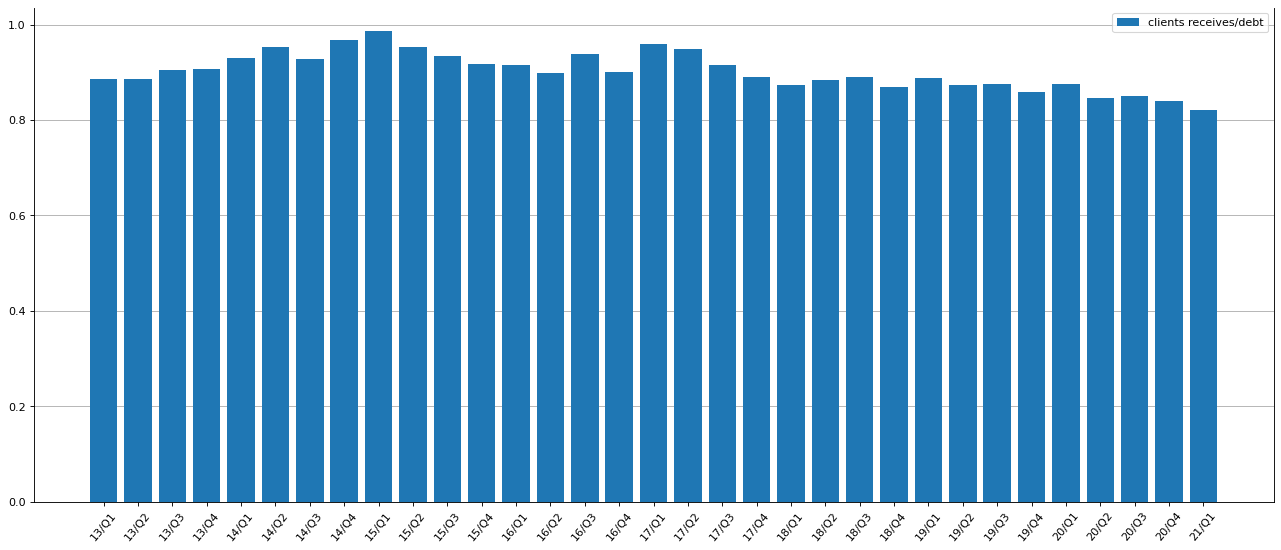

In [6]:
fin = Balance(df)
display(fin.equity())
display(fin.cover())